# **TCS iON: Rio 45-Automate detection of different sentiments from textual comments and feedback**

# Importing module

In [ ]:
import re
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


# Reading CSV dataset file of IMDB Review of movies


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset_tcs_ion/IMDB Dataset.csv")

In [ ]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


Checking null value in data if any

In [ ]:
df.isnull().values.any() 

False

Converting categorical data in number
 

In [ ]:
df['code'] = df['sentiment'].copy()
for i in range(len(df)):
    if df['sentiment'][i] == 'positive':
        df['code'][i] = 1
    else:
        df['code'][i] = 0

In [ ]:
df.head()

,review,sentiment,code
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [ ]:
X= df["review"]
y=df["code"]

Converting Code column in integer data type


In [ ]:
y = y.apply(pd.to_numeric)
y  

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: code, Length: 50000, dtype: int64

# Text Cleaning and Preprocessing

Importing modules

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download("punkt")
nltk.download('wordnet')
nltk.download("stopwords")
from nltk.stem import WordNetLemmatizer
lt= WordNetLemmatizer()
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk import corpus
corpus=[]
#text preprocessing
#removing special characters
#stemming using porter stemmer
for i in range(len(X)):
    text = re.sub('[^a-zA-Z]', ' ',X[i])
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)

In [ ]:
len(corpus)

50000

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
voc_size = 5000
onehot_repr = [one_hot(words,voc_size) for words in corpus]
onehot_repr

[[3442,
  1161,
  4084,
  1792,
  600,
  4701,
  4529,
  4485,
  4911,
  2324,
  3740,
  3740,
  919,
  2969,
  4243,
  600,
  3127,
  3468,
  408,
  254,
  4694,
  4485,
  430,
  3486,
  2285,
  1344,
  3750,
  3580,
  3597,
  1344,
  2320,
  587,
  1982,
  3444,
  4052,
  254,
  957,
  4433,
  4650,
  430,
  3740,
  3740,
  2627,
  600,
  160,
  4175,
  3620,
  281,
  1815,
  3290,
  2139,
  3784,
  1884,
  1473,
  4121,
  1952,
  4179,
  1020,
  1881,
  3611,
  1845,
  3957,
  4488,
  2282,
  3090,
  4017,
  2786,
  4121,
  565,
  4304,
  1322,
  1253,
  4345,
  3581,
  3873,
  3280,
  3311,
  201,
  4832,
  268,
  1199,
  3200,
  2012,
  968,
  1330,
  214,
  2921,
  3740,
  3740,
  3153,
  2390,
  4415,
  2778,
  1344,
  3136,
  3980,
  4821,
  1344,
  3055,
  176,
  2759,
  3258,
  2470,
  993,
  2561,
  176,
  3305,
  176,
  4507,
  600,
  2972,
  3369,
  919,
  4701,
  4425,
  4073,
  4243,
  2286,
  833,
  2390,
  3551,
  1792,
  2694,
  1405,
  600,
  4216,
  4797,
  3090,
  

In [ ]:
sent_length = 150
embedded_docs= pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[ 408  254 4694 ... 4620   59  435]
 [   0    0    0 ... 4266 3792 1527]
 [   0    0    0 ... 3486  663 2489]
 ...
 [   0    0    0 ... 1267  601 3873]
 [   0    0    0 ... 2422 4176 3341]
 [   0    0    0 ...  476 4458  187]]


In [ ]:
len(embedded_docs),y.shape

(50000, (50000,))

In [ ]:
embedding_dim = 100   
model = Sequential() 
model.add(Embedding(voc_size,embedding_dim,input_length=sent_length))   
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.add(Dropout(0.3))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          500000    
                                                                 
 dropout (Dropout)           (None, 150, 100)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 580,501
Trainable params: 580,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X_final = np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((50000, 150), (50000,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=200)

Epoch 1/5
168/168 [==============================] - 121s 721ms/step - loss: 2.5303 - accuracy: 0.7702 - val_loss: 0.4342 - val_accuracy: 0.8402
Epoch 2/5
168/168 [==============================] - 117s 698ms/step - loss: 2.4638 - accuracy: 0.7805 - val_loss: 0.4052 - val_accuracy: 0.8504
Epoch 3/5
168/168 [==============================] - 116s 694ms/step - loss: 2.5029 - accuracy: 0.7853 - val_loss: 0.4677 - val_accuracy: 0.8372
Epoch 4/5
168/168 [==============================] - 117s 696ms/step - loss: 2.5098 - accuracy: 0.7835 - val_loss: 0.5481 - val_accuracy: 0.7735
Epoch 5/5
168/168 [==============================] - 116s 688ms/step - loss: 2.4719 - accuracy: 0.7830 - val_loss: 0.4737 - val_accuracy: 0.8228


In [ ]:
y_pred=model.predict(X_test)
y_pred



array([[0.02290803],
       [0.61552083],
       [0.05761266],
       ...,
       [0.6826266 ],
       [0.678856  ],
       [0.39302972]], dtype=float32)

In [ ]:

m= len(y_pred)
for i in range(m):
  if y_pred[i] <= 0.5:
    y_pred[i]=0
  else:
    y_pred[i]=1
y_pred

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8228484848484848

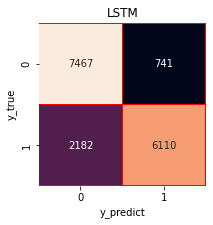

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linewidths=0.5,cbar=False,linecolor="red",fmt='.0f',ax=ax)
plt.xlabel("y_predict")
plt.ylabel("y_true")
ax.set(title=str('LSTM'))
plt.show()

AttributeError: ignored

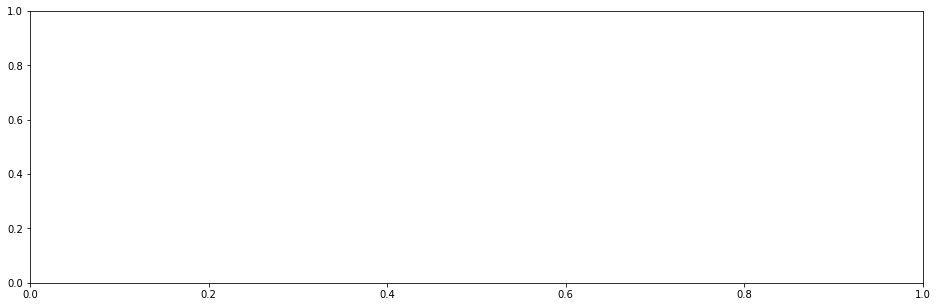

In [ ]:
# plt.figure(figsize=(16,5))
# epochs =range(1,len(history.history["accuracy"])+1)
# plt.plot(epochs, history.history['loss'],'b', label='Training Loss',colour='red')
# plt.plot(epochs,history.history["val_loss"],'b',label='validation Loss')
# plt.legend()
# plt.show()